# Исследование тарифов компании "Мегалайн"

Компания **«Мегалайн»** — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: **«Смарт»** и **«Ультра»**. Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей **«Мегалайна»**: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

**Тариф «Смарт»**

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
  * минута разговора: 3 рубля
  * сообщение: 3 рубля
  * 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
  * минута разговора: 1 рубль
  * сообщение: 1 рубль
  * 1 Гб интернет-трафика: 150 рублей

**«Мегалайн»** всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

**План выполнения проекта**

    1) Изучить данные из предоставленных датасетов;
    2) Подготовить данные:
        2.1) Привести данные к нужным типам;    
        2.2) Заполнить пропуски в данных;    
        2.3) Проверить данные на дубликаты;    
        2.4) Составить сводные таблицы с помесячным числом минут разговоров, отправленных сообщений и израсходаванного трафика для каждого пользователя;    
        2.5) Посчитать помесячную выручку от каждого клиента;    
    3) Проанализировать данные:
        3.1) Посчитать среднее, дисперсию и стандартное отклонение для минут разговора пользователей обоих тарифов. Построить гистограммы для этих величин;
        3.2) Посчитать среднее, дисперсию и стандартное отклонение для отправленных сообщений пользователей обоих тарифов. Построить гистограммы для этих величин;
        3.3) Посчитать среднее, дисперсию и стандартное отклонение для израсходованного трафика пользователей обоих тарифов. Построить гистограммы для этих величин;
    4) Проверить гипотезы:
        4.1) О различии выручки от пользователей тарифов;
        4.2) О различии выручки от пользователей из Москвы и от пользователей из других городов.

## Изучение данных из файлов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

### Данные о звонках

In [2]:
data_calls = pd.read_csv('/datasets/calls.csv')
display(data_calls.head(10))
print(data_calls.info())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


В таблице с информацией о звонках 202607 строк и 4 столбца: уникальный идентифекатор звонка, дата звонка, длительность звонка (в минутах), уникальный идентифекатор пользователя. В длительности звонков есть нулевые значения - это пропущенные звонки. Данные столбца с датой звонка небоходимо будет привести к типу `datetime`.

### Данные об интернет-сессиях

In [3]:
data_internet = pd.read_csv('/datasets/internet.csv', index_col=0)
display(data_internet.head(10))
print(data_internet.info())

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
None


В таблице с информацией об интернет-сессиях 149396 строк и 5 столбцов: уникальный идентифекатор интернет-сессии, количество потрачных мегабайт во время интернет-сессии, дата интернет-сессии, уникальный идентифекатор пользователя и `'Unnamed: 0'`, повторяющий номера строк таблицы (его нужно будет удалить). Данные столбца с датой интернет-сессии необходимо привести к типу `'datetime'`

### Данные о сообщениях

In [4]:
data_messages = pd.read_csv('/datasets/messages.csv')
display(data_messages.head(10))
print(data_messages.info())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


В таблице с информацией о сообщениях 123036 строк и 3 столбца: уникальный идентифекатор сообщения, дата отправки сообщения, уникальный идентифекатор пользователя. Данные столбца с датой отправки сообщения необходимо привести к типу `'datetime'`.

### Данные о тарифах

In [5]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_tariffs = data_tariffs.rename(columns={'tariff_name': 'tariff'})
display(data_tariffs)
print(data_tariffs.info())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff                 2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


В таблице 2 строки и 8 столбцов: кол-во предоставленных сообщений, кол-во предоставленных мб, кол-во предоставляемых минут для звонков, цена тарифа за месяц, цена за гб сверх тарифа, цена за сообщение сверх тарифа, цена за минуту разговора сверх тарифа, название тарифа.

### Данные о пользователях

In [6]:
data_users = pd.read_csv('/datasets/users.csv')
display(data_users.head(10))
print(data_users.info())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


В таблице 500 строк и 8 столбцов: уникальный идентифекатор пользователя, возраст пользователя, дата отмены тарифа, город проживания пользователя, имя пользователя, фамилия пользователя, дата подключения тарифа, используемый тариф. В столбце даты отмены тарифа есть пропуски, скорее всего они значат, что пользователь всё ещё продолжает пользоваться тарифом.

### Вывод

В таблицах полные данные, пропусков в таблицах нет, кроме столбца `'churn_date'` таблицы с данными о пользователях, но они означают, что клиент продожает пользоваться тарифом. Необходимо привести все столбцы с данными о датах к типу `'datetime'`,  округлить длительность звонка в данных о звонках до целых в большую сторону, ведь "Мегалайн" округляет все звонки до минут, а также удалить данные о пропущенных звонках (т.е. те, длительность которых равна `0`).

## Подготовка данных

### Подготовка данных о звонках

In [7]:
len(data_calls[data_calls['duration'] < 0])

0

In [8]:
data_calls = data_calls[data_calls['duration'] > 0].reset_index(drop=True) 
# В данных нет аномальных значений, которые меньше нуля,
# поэтому я применил такую конструкцию, чтобы избавиться от нулевых значений

In [9]:
#data_calls['duration'] = data_calls['duration'].apply(math.ceil)
data_calls['duration'] = np.ceil(data_calls['duration'])

In [10]:
data_calls['duration']

0          3.0
1         14.0
2          6.0
3         19.0
4         19.0
          ... 
162989     1.0
162990    19.0
162991    11.0
162992     5.0
162993    20.0
Name: duration, Length: 162994, dtype: float64

Минуты успешно округлены в большую сторону.

In [11]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

In [12]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162994 entries, 0 to 162993
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         162994 non-null  object        
 1   call_date  162994 non-null  datetime64[ns]
 2   duration   162994 non-null  float64       
 3   user_id    162994 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.0+ MB


Тип данных дат звонков успешно изменён.

In [13]:
data_calls.duplicated().sum()

0

В данных о звонках нет дубликатов.

#### Подсчёт количества успешных звонков и израсходованных минут по месяцам для каждого пользователя

In [14]:
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month

In [15]:
data_calls_pivot = data_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])

In [16]:
data_calls_pivot.columns = ['calls_count', 'calls_sum']

In [17]:
data_calls_pivot = data_calls_pivot.reset_index()
data_calls_pivot

,user_id,month,calls_count,calls_sum
0,1000,5,17,159.0
1,1000,6,28,172.0
2,1000,7,41,340.0
3,1000,8,42,408.0
4,1000,9,46,466.0
...,...,...,...,...
3163,1498,10,30,247.0
3164,1499,9,8,70.0
3165,1499,10,44,449.0
3166,1499,11,62,612.0


### Подготовка данных об интернет-сессиях

In [18]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')

Данные о дате интернет-сессии приведены к типу `'datetime'`.

In [19]:
data_internet.duplicated().sum()

0

Дубликатов в данных об интернет сессиях нет.

#### Подсчёт истраченного интернет-трафика по месяцам для каждого пользователя

In [20]:
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month

In [21]:
data_internet_pivot = data_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum'])

In [22]:
data_internet_pivot.columns = ['mb_used_sum']

In [23]:
data_internet_pivot = data_internet_pivot.reset_index()
data_internet_pivot

,user_id,month,mb_used_sum
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


### Подготовка данных о сообщениях

In [24]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

Тип данных столбца с данными о дате сообщения успешно изменен на `'datetime'`.

#### Подсчёт отправленных сообщений по месяцам для каждого пользователя

In [25]:
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month

In [26]:
data_messages_pivot = data_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc=['count'])

In [27]:
data_messages_pivot.columns = ['messages_count']

In [28]:
data_messages_pivot = data_messages_pivot.reset_index()
data_messages_pivot

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


### Подсчёт помесячной выручки с каждого пользователя

In [29]:
full_data = data_calls_pivot.merge(data_messages_pivot, on=['user_id', 'month'], how='outer')
full_data = full_data.merge(data_internet_pivot, on=['user_id', 'month'], how='outer')
full_data = full_data.merge(data_users, on='user_id', how='outer')
full_data = full_data.merge(data_tariffs, on='tariff', how='outer')
full_data = full_data.sort_values(by=['user_id', 'month'])
full_data

,user_id,month,calls_count,calls_sum,messages_count,mb_used_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,17.0,159.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,28.0,172.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,41.0,340.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,42.0,408.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,46.0,466.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,1498,10.0,30.0,247.0,42.0,20579.36,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3
3206,1499,9.0,8.0,70.0,11.0,1845.75,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3207,1499,10.0,44.0,449.0,48.0,17788.51,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3208,1499,11.0,62.0,612.0,59.0,17963.31,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3


In [30]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3209
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3216 non-null   int64  
 1   month                  3214 non-null   float64
 2   calls_count            3168 non-null   float64
 3   calls_sum              3168 non-null   float64
 4   messages_count         2717 non-null   float64
 5   mb_used_sum            3203 non-null   float64
 6   age                    3216 non-null   int64  
 7   churn_date             189 non-null    object 
 8   city                   3216 non-null   object 
 9   first_name             3216 non-null   object 
 10  last_name              3216 non-null   object 
 11  reg_date               3216 non-null   object 
 12  tariff                 3216 non-null   object 
 13  messages_included      3216 non-null   int64  
 14  mb_per_month_included  3216 non-null   int64  
 15  minu

In [31]:
full_data['calls_count'] = full_data['calls_count'].fillna(0)
full_data['calls_sum'] = full_data['calls_sum'].fillna(0)
full_data['messages_count'] = full_data['messages_count'].fillna(0)
full_data['mb_used_sum'] = full_data['mb_used_sum'].fillna(0)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3209
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3216 non-null   int64  
 1   month                  3214 non-null   float64
 2   calls_count            3216 non-null   float64
 3   calls_sum              3216 non-null   float64
 4   messages_count         3216 non-null   float64
 5   mb_used_sum            3216 non-null   float64
 6   age                    3216 non-null   int64  
 7   churn_date             189 non-null    object 
 8   city                   3216 non-null   object 
 9   first_name             3216 non-null   object 
 10  last_name              3216 non-null   object 
 11  reg_date               3216 non-null   object 
 12  tariff                 3216 non-null   object 
 13  messages_included      3216 non-null   int64  
 14  mb_per_month_included  3216 non-null   int64  
 15  minu

In [32]:
full_data['dif_message'] = full_data['messages_count'] - full_data['messages_included']
full_data['dif_minutes'] = full_data['calls_sum'] - full_data['minutes_included']
full_data['dif_mb'] = full_data['mb_used_sum'] - full_data['mb_per_month_included']
full_data

,user_id,month,calls_count,calls_sum,messages_count,mb_used_sum,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,dif_message,dif_minutes,dif_mb
0,1000,5.0,17.0,159.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-978.0,-2841.0,-28466.51
1,1000,6.0,28.0,172.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-940.0,-2828.0,-7486.23
2,1000,7.0,41.0,340.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-925.0,-2660.0,-16716.36
3,1000,8.0,42.0,408.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-919.0,-2592.0,-16664.07
4,1000,9.0,46.0,466.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-943.0,-2534.0,-16151.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,1498,10.0,30.0,247.0,42.0,20579.36,68,2018-10-25,Владикавказ,Всеволод,...,50,15360,500,550,200,3,3,-8.0,-253.0,5219.36
3206,1499,9.0,8.0,70.0,11.0,1845.75,35,NaN,Пермь,Гектор,...,50,15360,500,550,200,3,3,-39.0,-430.0,-13514.25
3207,1499,10.0,44.0,449.0,48.0,17788.51,35,NaN,Пермь,Гектор,...,50,15360,500,550,200,3,3,-2.0,-51.0,2428.51
3208,1499,11.0,62.0,612.0,59.0,17963.31,35,NaN,Пермь,Гектор,...,50,15360,500,550,200,3,3,9.0,112.0,2603.31


In [33]:
full_data['dif_message'] = full_data['dif_message'].where(full_data['dif_message'] > 0, 0)
full_data['dif_minutes'] = full_data['dif_minutes'].where(full_data['dif_minutes'] > 0, 0)
full_data['dif_mb'] = full_data['dif_mb'].where(full_data['dif_mb'] > 0, 0)

full_data['dif_gb'] = np.ceil(full_data['dif_mb'] / 1024)

full_data

,user_id,month,calls_count,calls_sum,messages_count,mb_used_sum,age,churn_date,city,first_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,dif_message,dif_minutes,dif_mb,dif_gb
0,1000,5.0,17.0,159.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0.0,0.00,0.0
1,1000,6.0,28.0,172.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0.0,0.00,0.0
2,1000,7.0,41.0,340.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0.0,0.00,0.0
3,1000,8.0,42.0,408.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0.0,0.00,0.0
4,1000,9.0,46.0,466.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,1498,10.0,30.0,247.0,42.0,20579.36,68,2018-10-25,Владикавказ,Всеволод,...,15360,500,550,200,3,3,0.0,0.0,5219.36,6.0
3206,1499,9.0,8.0,70.0,11.0,1845.75,35,NaN,Пермь,Гектор,...,15360,500,550,200,3,3,0.0,0.0,0.00,0.0
3207,1499,10.0,44.0,449.0,48.0,17788.51,35,NaN,Пермь,Гектор,...,15360,500,550,200,3,3,0.0,0.0,2428.51,3.0
3208,1499,11.0,62.0,612.0,59.0,17963.31,35,NaN,Пермь,Гектор,...,15360,500,550,200,3,3,9.0,112.0,2603.31,3.0


In [34]:
full_data['profit'] = (full_data['rub_monthly_fee'] +
                      full_data['dif_message'] * full_data['rub_per_message'] +
                      full_data['dif_minutes'] * full_data['rub_per_minute'] + 
                      full_data['dif_gb'] * full_data['rub_per_gb'])
full_data

,user_id,month,calls_count,calls_sum,messages_count,mb_used_sum,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,dif_message,dif_minutes,dif_mb,dif_gb,profit
0,1000,5.0,17.0,159.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,0.0,0.0,0.00,0.0,1950.0
1,1000,6.0,28.0,172.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,0.0,0.0,0.00,0.0,1950.0
2,1000,7.0,41.0,340.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,0.0,0.0,0.00,0.0,1950.0
3,1000,8.0,42.0,408.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,0.0,0.0,0.00,0.0,1950.0
4,1000,9.0,46.0,466.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,0.0,0.0,0.00,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,1498,10.0,30.0,247.0,42.0,20579.36,68,2018-10-25,Владикавказ,Всеволод,...,500,550,200,3,3,0.0,0.0,5219.36,6.0,1750.0
3206,1499,9.0,8.0,70.0,11.0,1845.75,35,NaN,Пермь,Гектор,...,500,550,200,3,3,0.0,0.0,0.00,0.0,550.0
3207,1499,10.0,44.0,449.0,48.0,17788.51,35,NaN,Пермь,Гектор,...,500,550,200,3,3,0.0,0.0,2428.51,3.0,1150.0
3208,1499,11.0,62.0,612.0,59.0,17963.31,35,NaN,Пермь,Гектор,...,500,550,200,3,3,9.0,112.0,2603.31,3.0,1513.0


In [35]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3209
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3216 non-null   int64  
 1   month                  3214 non-null   float64
 2   calls_count            3216 non-null   float64
 3   calls_sum              3216 non-null   float64
 4   messages_count         3216 non-null   float64
 5   mb_used_sum            3216 non-null   float64
 6   age                    3216 non-null   int64  
 7   churn_date             189 non-null    object 
 8   city                   3216 non-null   object 
 9   first_name             3216 non-null   object 
 10  last_name              3216 non-null   object 
 11  reg_date               3216 non-null   object 
 12  tariff                 3216 non-null   object 
 13  messages_included      3216 non-null   int64  
 14  mb_per_month_included  3216 non-null   int64  
 15  minu

In [36]:

clean_full_data = full_data.drop(['calls_count',
                                  'age',
                                  'churn_date',
                                  'first_name',
                                  'last_name',
                                  'reg_date',
                                  'messages_included',
                                  'mb_per_month_included',
                                  'minutes_included',
                                  'rub_monthly_fee',
                                  'rub_per_gb',
                                  'rub_per_message',
                                  'rub_per_minute',
                                  'dif_message',
                                  'dif_minutes', 
                                  'dif_mb', 
                                  'dif_gb'],
                                      axis=1)
clean_full_data

,user_id,month,calls_sum,messages_count,mb_used_sum,city,tariff,profit
0,1000,5.0,159.0,22.0,2253.49,Краснодар,ultra,1950.0
1,1000,6.0,172.0,60.0,23233.77,Краснодар,ultra,1950.0
2,1000,7.0,340.0,75.0,14003.64,Краснодар,ultra,1950.0
3,1000,8.0,408.0,81.0,14055.93,Краснодар,ultra,1950.0
4,1000,9.0,466.0,57.0,14568.91,Краснодар,ultra,1950.0
...,...,...,...,...,...,...,...,...
3205,1498,10.0,247.0,42.0,20579.36,Владикавказ,smart,1750.0
3206,1499,9.0,70.0,11.0,1845.75,Пермь,smart,550.0
3207,1499,10.0,449.0,48.0,17788.51,Пермь,smart,1150.0
3208,1499,11.0,612.0,59.0,17963.31,Пермь,smart,1513.0


In [37]:
# check
clean_full_data['profit'].sum()

4916951.0

### Вывод

На основе исходных таблиц была создана общая таблица, в которую вошли уникальные идентифекаторы пользователей, их города проживания, их тарифы, а также месяцы пользования и помесячные длительности звонков (в минутах), отправленные сообщения, мегабайты использованного интернета, выручки.

## Анализ данных

### Анализ длительности звонков пользователей тарифов ‘Smart’ и ’Ultra’

Средняя длительность звонка пользователей тарифа "Smart": 417.747533632287
Дисперсия длительности звонка пользователей тарифа "Smart": 36265.12415310985
Стандартное отклонение длительности звонка пользователей тарифа "Smart": 190.4340414765959


Text(0, 0.5, 'Число пользователей')

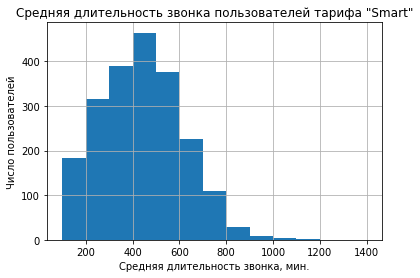

In [38]:
print('Средняя длительность звонка пользователей тарифа "Smart":', 
      clean_full_data.query('tariff == "smart"')['calls_sum'].mean())
print('Дисперсия длительности звонка пользователей тарифа "Smart":', 
      np.var(clean_full_data.query('tariff == "smart"')['calls_sum']))
print('Стандартное отклонение длительности звонка пользователей тарифа "Smart":', 
      np.std(clean_full_data.query('tariff == "smart"')['calls_sum']))


 
smart_call_graf = clean_full_data.query('tariff == "smart"')['calls_sum'].hist(bins=[100, 200, 300, 400, 500, 600, 700, 
                                                                                    800, 900, 1000, 1100, 1200, 1300, 1400])
smart_call_graf.set_title('Средняя длительность звонка пользователей тарифа "Smart"')
smart_call_graf.set_xlabel('Средняя длительность звонка, мин.')
smart_call_graf.set_ylabel('Число пользователей')

Диаграмма суммарной длительности звонков по месяцам пользователей тарифа 'Smart' скошенна положительно. Судя по пику гистограммы, в основном пользователи тарифа 'Smart' тратят от 400 до 500 минут в месяц на звонки.

Средняя длительность звонка пользователей тарифа "Ultra": 526.0892494929006
Дисперсия длительности звонка пользователей тарифа "Ultra": 100950.00623331097
Стандартное отклонение длительности звонка пользователей тарифа "Ultra": 317.72630711559117


Text(0, 0.5, 'Число пользователей')

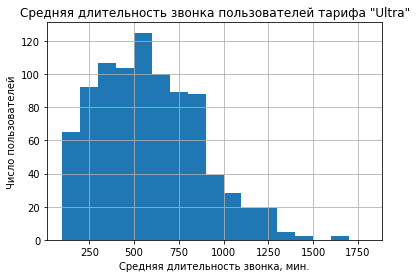

In [39]:
print('Средняя длительность звонка пользователей тарифа "Ultra":', 
      clean_full_data.query('tariff == "ultra"')['calls_sum'].mean())
print('Дисперсия длительности звонка пользователей тарифа "Ultra":', 
      np.var(clean_full_data.query('tariff == "ultra"')['calls_sum']))
print('Стандартное отклонение длительности звонка пользователей тарифа "Ultra":', 
      np.std(clean_full_data.query('tariff == "ultra"')['calls_sum']))
ultra_call_graf = clean_full_data.query('tariff == "ultra"')['calls_sum'].hist(bins=[100, 200, 300, 400, 500, 600, 700, 800, 900, 
                                                                                     1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800])
ultra_call_graf.set_title('Средняя длительность звонка пользователей тарифа "Ultra"')
ultra_call_graf.set_xlabel('Средняя длительность звонка, мин.')
ultra_call_graf.set_ylabel('Число пользователей')

Диаграмма суммарной длительности звонков по месяцам пользователей тарифа 'Ultra' скошенна положительно. Судя по пику гистограммы, в основном пользователи тарифа 'Smart' тратят от 500 до 600 минут в месяц на звонки.

#### Вывод

В среднем пользователи тарифа 'Ultra' тратят на звонки на 100 минут больше, чем пользователи тарифа 'Smart'. Однако средний разброс и отклонение у пользователей тарифа 'Ultra' больше. Это обусловлено меньшим числом пользователей этого тарифа.

### Анализ количества сообщений пользователей тарифов ‘Smart’ и ’Ultra’

Среднее количество сообщений пользователей тарифа "Smart": 33.36905829596412
Дисперсия количества сообщений пользователей тарифа "Smart": 796.5978766916688
Стандартное отклонение количества сообщений пользователей тарифа "Smart": 28.224065559229217


Text(0, 0.5, 'Число пользователей')

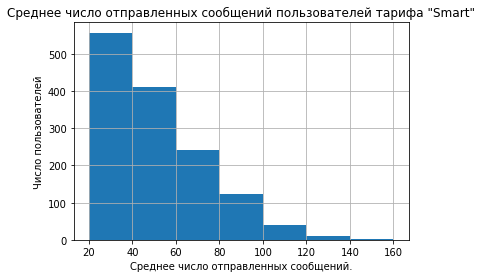

In [40]:
print('Среднее количество сообщений пользователей тарифа "Smart":', 
      clean_full_data.query('tariff == "smart"')['messages_count'].mean())
print('Дисперсия количества сообщений пользователей тарифа "Smart":', 
      np.var(clean_full_data.query('tariff == "smart"')['messages_count']))
print('Стандартное отклонение количества сообщений пользователей тарифа "Smart":', 
      np.std(clean_full_data.query('tariff == "smart"')['messages_count']))
smart_messages_graf = clean_full_data.query('tariff == "smart"')['messages_count'].hist(bins=[20, 40, 60, 80, 
                                                                                              100, 120, 140, 160])

smart_messages_graf.set_title('Среднее число отправленных сообщений пользователей тарифа "Smart"')
smart_messages_graf.set_xlabel('Среднее число отправленных сообщений.')
smart_messages_graf.set_ylabel('Число пользователей')

Диаграмма количества сообщений пользователей тарифа "Smart" скошена вправо, причём её пик находится в самом начале графика. Это говорит о том, что большинство пользователей отправляют от 20 до 40 сообщений в месяц, причём пользователей отправляющих больше сообщений, всё меньше. Это связано с развитием мессенджеров и соц. сетей в наше время.

Среднее количество сообщений пользователей тарифа "Ultra": 49.31338742393509
Дисперсия количества сообщений пользователей тарифа "Ultra": 2283.0995570851965
Стандартное отклонение количества сообщений пользователей тарифа "Ultra": 47.781791061922284


Text(0, 0.5, 'Число пользователей')

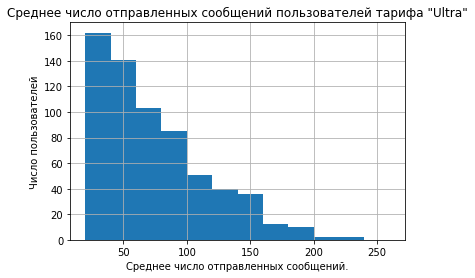

In [41]:
print('Среднее количество сообщений пользователей тарифа "Ultra":', 
      clean_full_data.query('tariff == "ultra"')['messages_count'].mean())
print('Дисперсия количества сообщений пользователей тарифа "Ultra":', 
      np.var(clean_full_data.query('tariff == "ultra"')['messages_count']))
print('Стандартное отклонение количества сообщений пользователей тарифа "Ultra":', 
      np.std(clean_full_data.query('tariff == "ultra"')['messages_count']))

ultra_messages_graf = clean_full_data.query('tariff == "ultra"')['messages_count'].hist(bins=[20, 40, 60, 80, 100, 120, 140, 
                                                                                              160, 180, 200, 220, 240, 260])
ultra_messages_graf.set_title('Среднее число отправленных сообщений пользователей тарифа "Ultra"')
ultra_messages_graf.set_xlabel('Среднее число отправленных сообщений.')
ultra_messages_graf.set_ylabel('Число пользователей')

Диаграмма количества сообщений пользователей тарифа "Ultra" аналогична диаграмме количества сообщений пользователей тарифа "Smart". Большинство пользователей редко отправляют сообщения, т.к. Существуют мессенджеры и соц. сети.

#### Вывод

В среднем пользователи обоих тарифов отправляют до 40 сообщений в месяц. Однако средний разброс и отклонение у пользователей тарифа 'Ultra' больше. Это обусловлено меньшим числом пользователей этого тарифа.

### Анализ объёма трафика пользователей тарифов ‘Smart’ и ’Ultra’

Средний объём трафика пользователей тарифа "Smart"(гб): 15.82140493623879
Дисперсия объёма трафика пользователей тарифа "Smart": 33739.59331199699
Стандартное отклонение объёма трафика пользователей тарифа "Smart": 5.740106409618821


Text(0, 0.5, 'Число пользователей')

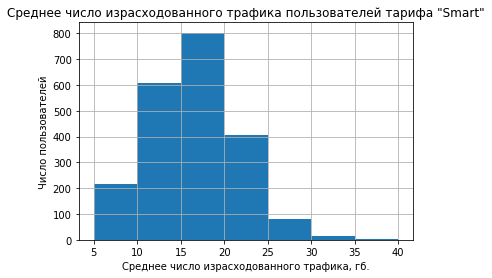

In [42]:
print('Средний объём трафика пользователей тарифа "Smart"(гб):', 
      (clean_full_data.query('tariff == "smart"')['mb_used_sum']/1024).mean())
print('Дисперсия объёма трафика пользователей тарифа "Smart":', 
      np.var(clean_full_data.query('tariff == "smart"')['mb_used_sum'])/1024)
print('Стандартное отклонение объёма трафика пользователей тарифа "Smart":', 
      np.std(clean_full_data.query('tariff == "smart"')['mb_used_sum'])/1024)
smart_gb_used_graf = (clean_full_data.query('tariff == "smart"')['mb_used_sum']/1024).hist(bins=[5, 10, 15, 20, 
                                                                                          25, 30, 35, 40])

smart_gb_used_graf.set_title('Среднее число израсходованного трафика пользователей тарифа "Smart"')
smart_gb_used_graf.set_xlabel('Среднее число израсходованного трафика, гб.')
smart_gb_used_graf.set_ylabel('Число пользователей')

Диаграмма объёма трафика пользователей тарифа "Smart" скошена вправо. В среднем пользователям тарифа 'Smart' необходимо от 15 до 20 тыс. мб трафика.

Средний объём трафика пользователей тарифа "Ultra": 18.993222626537147
Дисперсия объёма трафика пользователей тарифа "Ultra": 99539.69590165532
Стандартное отклонение объёма трафика пользователей тарифа "Ultra": 9.859347558482776


Text(0, 0.5, 'Число пользователей')

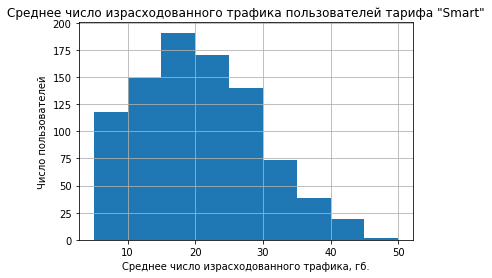

In [43]:
print('Средний объём трафика пользователей тарифа "Ultra":', 
      (clean_full_data.query('tariff == "ultra"')['mb_used_sum']/1024).mean())
print('Дисперсия объёма трафика пользователей тарифа "Ultra":', 
      np.var(clean_full_data.query('tariff == "ultra"')['mb_used_sum'])/1024)
print('Стандартное отклонение объёма трафика пользователей тарифа "Ultra":', 
      np.std(clean_full_data.query('tariff == "ultra"')['mb_used_sum'])/1024)
ultra_gb_used_graf = (clean_full_data.query('tariff == "ultra"')['mb_used_sum']/1024).hist(bins=[5, 10, 15, 20, 25, 
                                                                     30, 35, 40, 45, 50])

ultra_gb_used_graf.set_title('Среднее число израсходованного трафика пользователей тарифа "Smart"')
ultra_gb_used_graf.set_xlabel('Среднее число израсходованного трафика, гб.')
ultra_gb_used_graf.set_ylabel('Число пользователей')

Диаграмма объёма трафика пользователей тарифа "Ultra" скошена вправо. В среднем пользователям тарифа 'Ultra' необходимо от 15 до 25 тыс. мб трафика. 

#### Вывод

Пользователи тарифа 'Ultra' немного активнее пользуются интернетом, чем пользователи тарифа 'Smart'. Но средний разброс и отклонение больше, т.к. пользователей тарифа 'Ultra' меньше.

## Проверка гипотез

### Проверка гипотезы о неравенстве средней выручки пользователей тарифов 'Smart' и 'Ultra'

**H0**: Средняя выручка от пользователей тарифа 'Smart' равна средней выручке пользователей тарифа 'Ultra'

**H1**: Средняя выручка от пользователей тарифа 'Smart' не равна средней выручке пользователей тарифа 'Ultra'

Для проверки гипотезы необходимо:
1) Посчитать выручку от каждого пользователя; 

2) Узнать количество пользователей каждого тарифа;

3) Выбрать одинаковое количество пользователей в процентном соотношении для каждого тарифа;

4) Составить выборки на основе этих данных.

In [44]:
tarif_profit_table = clean_full_data.pivot_table(index=['tariff', 'user_id'], values='profit', aggfunc='sum').reset_index()
tarif_profit_table

,tariff,user_id,profit
0,smart,1001,1700.0
1,smart,1002,7250.0
2,smart,1005,9924.0
3,smart,1006,10250.0
4,smart,1007,8221.0
...,...,...,...
495,ultra,1476,17550.0
496,ultra,1485,1950.0
497,ultra,1491,17550.0
498,ultra,1493,5700.0


In [45]:
# Создание двух выборок
ultra_user_profit = clean_full_data.query('tariff == "ultra"').reset_index()
smart_user_profit = clean_full_data.query('tariff == "smart"').reset_index()

In [46]:
alpha = 0.05

results = st.ttest_ind(ultra_user_profit['profit'], smart_user_profit['profit'], equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевую гипотезу отвергнуть не удалось')

p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу


In [47]:
if ultra_user_profit['profit'].sum() > smart_user_profit['profit'].sum():
    print('Суммарная выручка от пользователей тарифа "Ultra" больше')
else:
    print('Суммарная выручка от пользователей тарифа "Smart" больше')

Суммарная выручка от пользователей тарифа "Smart" больше


In [48]:
sum_10_smart = 0
sum_10_ultra = 0

for i in range(10):
    sum_10_ultra = ultra_user_profit.loc[i, 'profit']
    sum_10_smart = smart_user_profit.loc[i, 'profit']
    
if sum_10_ultra > sum_10_smart:
    print('Выручка за 10 месяцев разных пользователей тарифа "Ultra" больше')
else:
    print('Выручка за 10 месяцев разных пользователей тарифа "Smart" больше')

Выручка за 10 месяцев разных пользователей тарифа "Ultra" больше


#### Вывод

Так как p-значение оказалось меньше порогового, гипотеза о равенстве выручки от тарифов отвергается. Суммарная выручка от пользователей тарифа "Smart" оказалась больше. Однако выручка за 10 месяцев разных пользователей тарифа "Ultra" оказалась больше. Это говорит о том, что основную часть выручки приносят пользователи тарифа 'Smart', но если больше пользователей будут пользоваться тарифом "Ultra", то выручка компании "Мегалайн" вырастет.

### Проверка гипотезы о неравенстве средней выручки пользователей из Москвы и пользователей из  других городов

**H0**: Средняя выручка от пользователей Москвы равна средней выручке от пользователей остальных городов

**H1**: Средняя выручка от пользователей Москвы не равна средней выручке от пользователей остальных городов

Для проверки гипотезы необходимо:
1) Посчитать выручку от каждого пользователя; 

2) Узнать количество пользователей Москвы и остальных городов;

3) Выбрать одинаковое количество пользователей в процентном соотношении для Москвы и остальных городов;

4) Составить выборки на основе этих данных.

In [49]:
city_profit_table = clean_full_data.pivot_table(index=['city', 'user_id'], values='profit', aggfunc='sum').reset_index()
city_profit_table

,city,user_id,profit
0,Архангельск,1135,15559.0
1,Астрахань,1066,12965.0
2,Астрахань,1253,9750.0
3,Астрахань,1280,7920.0
4,Астрахань,1423,11600.0
...,...,...,...
495,Якутск,1074,2190.0
496,Якутск,1147,9900.0
497,Ярославль,1039,13650.0
498,Ярославль,1198,4750.0


In [50]:
moscow_user_profit = clean_full_data.query('city == "Москва"')
other_city_user_profit = clean_full_data.query('city != "Москва"')

#for i in range(len(city_profit_table)):
#    if city_profit_table.loc[i, 'city'] == 'Москва':
#        moscow_user_profit.append(city_profit_table.loc[i, 'profit'])
#    if len(moscow_user_profit) == 10:
#        break

#for i in range(len(city_profit_table)):
#    if city_profit_table.loc[i, 'city'] != 'Москва':
#        other_city_user_profit.append(city_profit_table.loc[i, 'profit'])
#    if len(ultra_user_profit) == 40:
#        break

In [51]:
alpha = 0.05

results = st.ttest_ind(moscow_user_profit['profit'], other_city_user_profit['profit'], equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевую гипотезу отвергнуть не удалось')

p-значение: 0.5216952110000278
Нулевую гипотезу отвергнуть не удалось


#### Вывод

Так как p-значение оказалось больше порогового (причём значительно), гипотеза о равенстве выручки из Москвы и выручки из остальных городов удалось опровергнуть. Это означает, что выручка не зависит от места жительства пользователей.

In [52]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


## Общий вывод

В ходе проделанной работы были посчитаны помесячные выручки от каждого пользователя. Было выяснено, что пользователи тарифа 'Ultra' тратят больше минут и мб трафика, чем пользователи тарифа 'Smart', причём пользователи обоих тарифов отправляют одинаково малое количество сообщений, потому что скорее всего большинство пользователей пользуются мессенджерами и соц. сетями.

Были проверены две гипотезы: о неравенстве средней выручки обоих тарифов и неравенстве выручки Москвы и выручке других городов.

В ходе проверки первой гипотезы выяснилось, что тариф 'Smart' приносит большую чать выручки, т.к. пользователей этого тарифа больше. Но при рассмотрении 10 разных месяцев выяснилось, что выручка от пользователей 'Ultra' выше. Следовательно, если удастся убедить пользователей 'Smart' перейти на тариф 'Ultra', то при том же числе пользователей выручка "Мегалайна" вырастет.

В ходе проверки второй гипотезы выяснилось, что выручка никак не зависит от места жительства пользователя.